# Decision Trees

*Created by: Meghana Bhimasani, June 5,2020*

Sources: https://www.datacamp.com/community/tutorials/decision-tree-classification-python, https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248, https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

Decision Tree models are created using 2 steps: **Induction** and **Pruning**. Induction is where we actually build the tree i.e set all of the hierarchical decision boundaries based on our data. Because of the nature of training decision trees they can be prone to major overfitting. Pruning is the process of removing the unnecessary structure from a decision tree, effectively reducing the complexity to combat overfitting with the added bonus of making it even easier to interpret.

### How does the Decision Tree algorithm work?

The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
    * All the tuples belong to the same attribute value.
    * There are no more remaining attributes.
    * There are no more instances.

## Attribute Selection Measures

Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute (Source). In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

## Decision Tree Classifier Building in Scikit-learn

In [29]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import os

In [2]:
df = pd.read_csv(os.path.join("Resources", "diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [3]:
#split dataset in features and target variable
X = df.drop("Outcome", axis=1) # Features
y = df["Outcome"] # Target variable
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Divide the dataset into a training set and a test set

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 75% training and 25% test

### Build Decision Tree Model using Sk Learn. (Without pruning)

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [14]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6875


### Visualizing Decision Trees

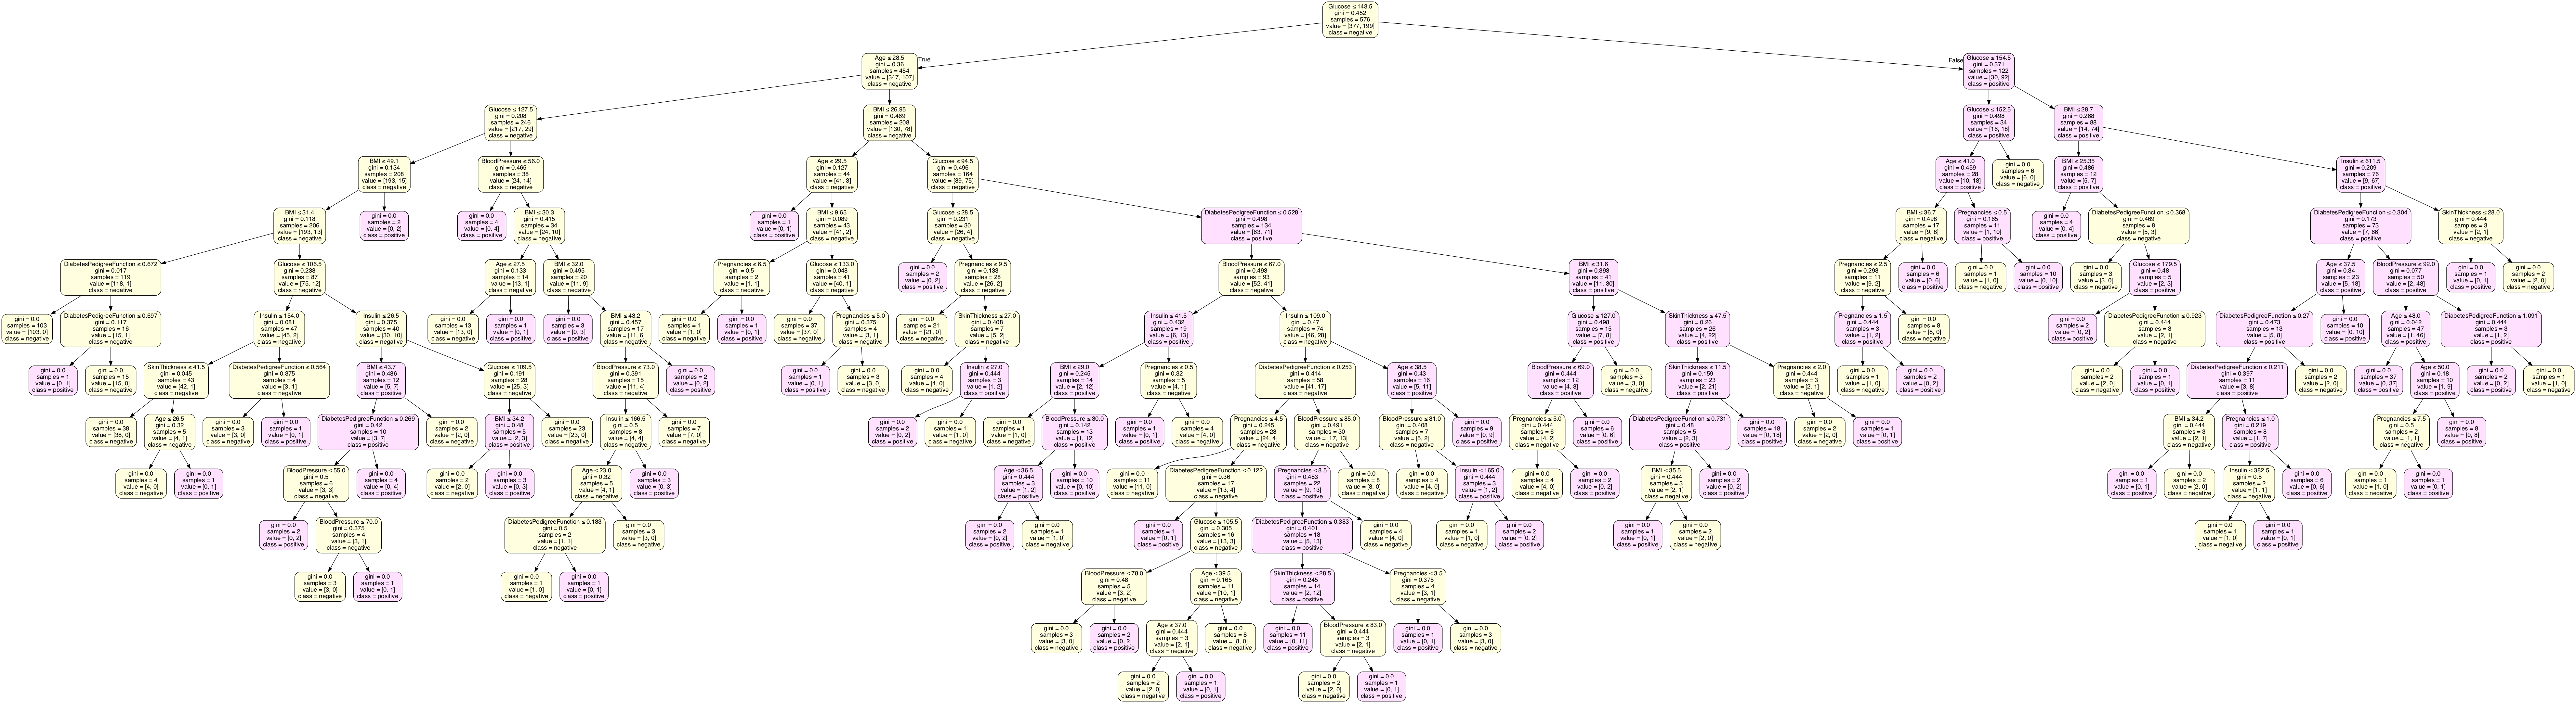

In [31]:
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names = ["negative", "positive"]

dot_data = export_graphviz(clf, out_file=None,  
                feature_names = feature_names,
                class_names=target_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 

## Color of nodes
nodes = graph.get_node_list()
for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [224,255,255],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )

filename = "diabetes.png"
graph.write_png(filename)
Image(graph.create_png())

### Pruning - Optimizing Decision Tree Performance

There are several parameters that you can set for your decision tree model:

* **criterion** : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
* **max_depth** : int or None, optional (default=None). The max depth of the tree where we will stop splitting the nodes. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. This is similar to controlling the maximum number of layers in a deep neural network. Lower will make your model faster but not as accurate (can cause underfitting); higher can give you accuracy but risks overfitting and may be slow.
* **min_samples_split** : int or float, (default=2). The minimum number of samples required to split a node. 
* **max_features** : int, float or {“auto”, “sqrt”, “log2”}, (default=None). The number of features to consider when looking for the best split. Higher means potentially better results with the tradeoff of training taking longer.
* **min_impurity_split** : float, (default=0). Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold. This can be used to tradeoff combating overfitting (high value, small tree) vs high accuracy (low value, big tree).

In [44]:
#### use entropy and increase min_samples_split #### 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=50)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7552083333333334


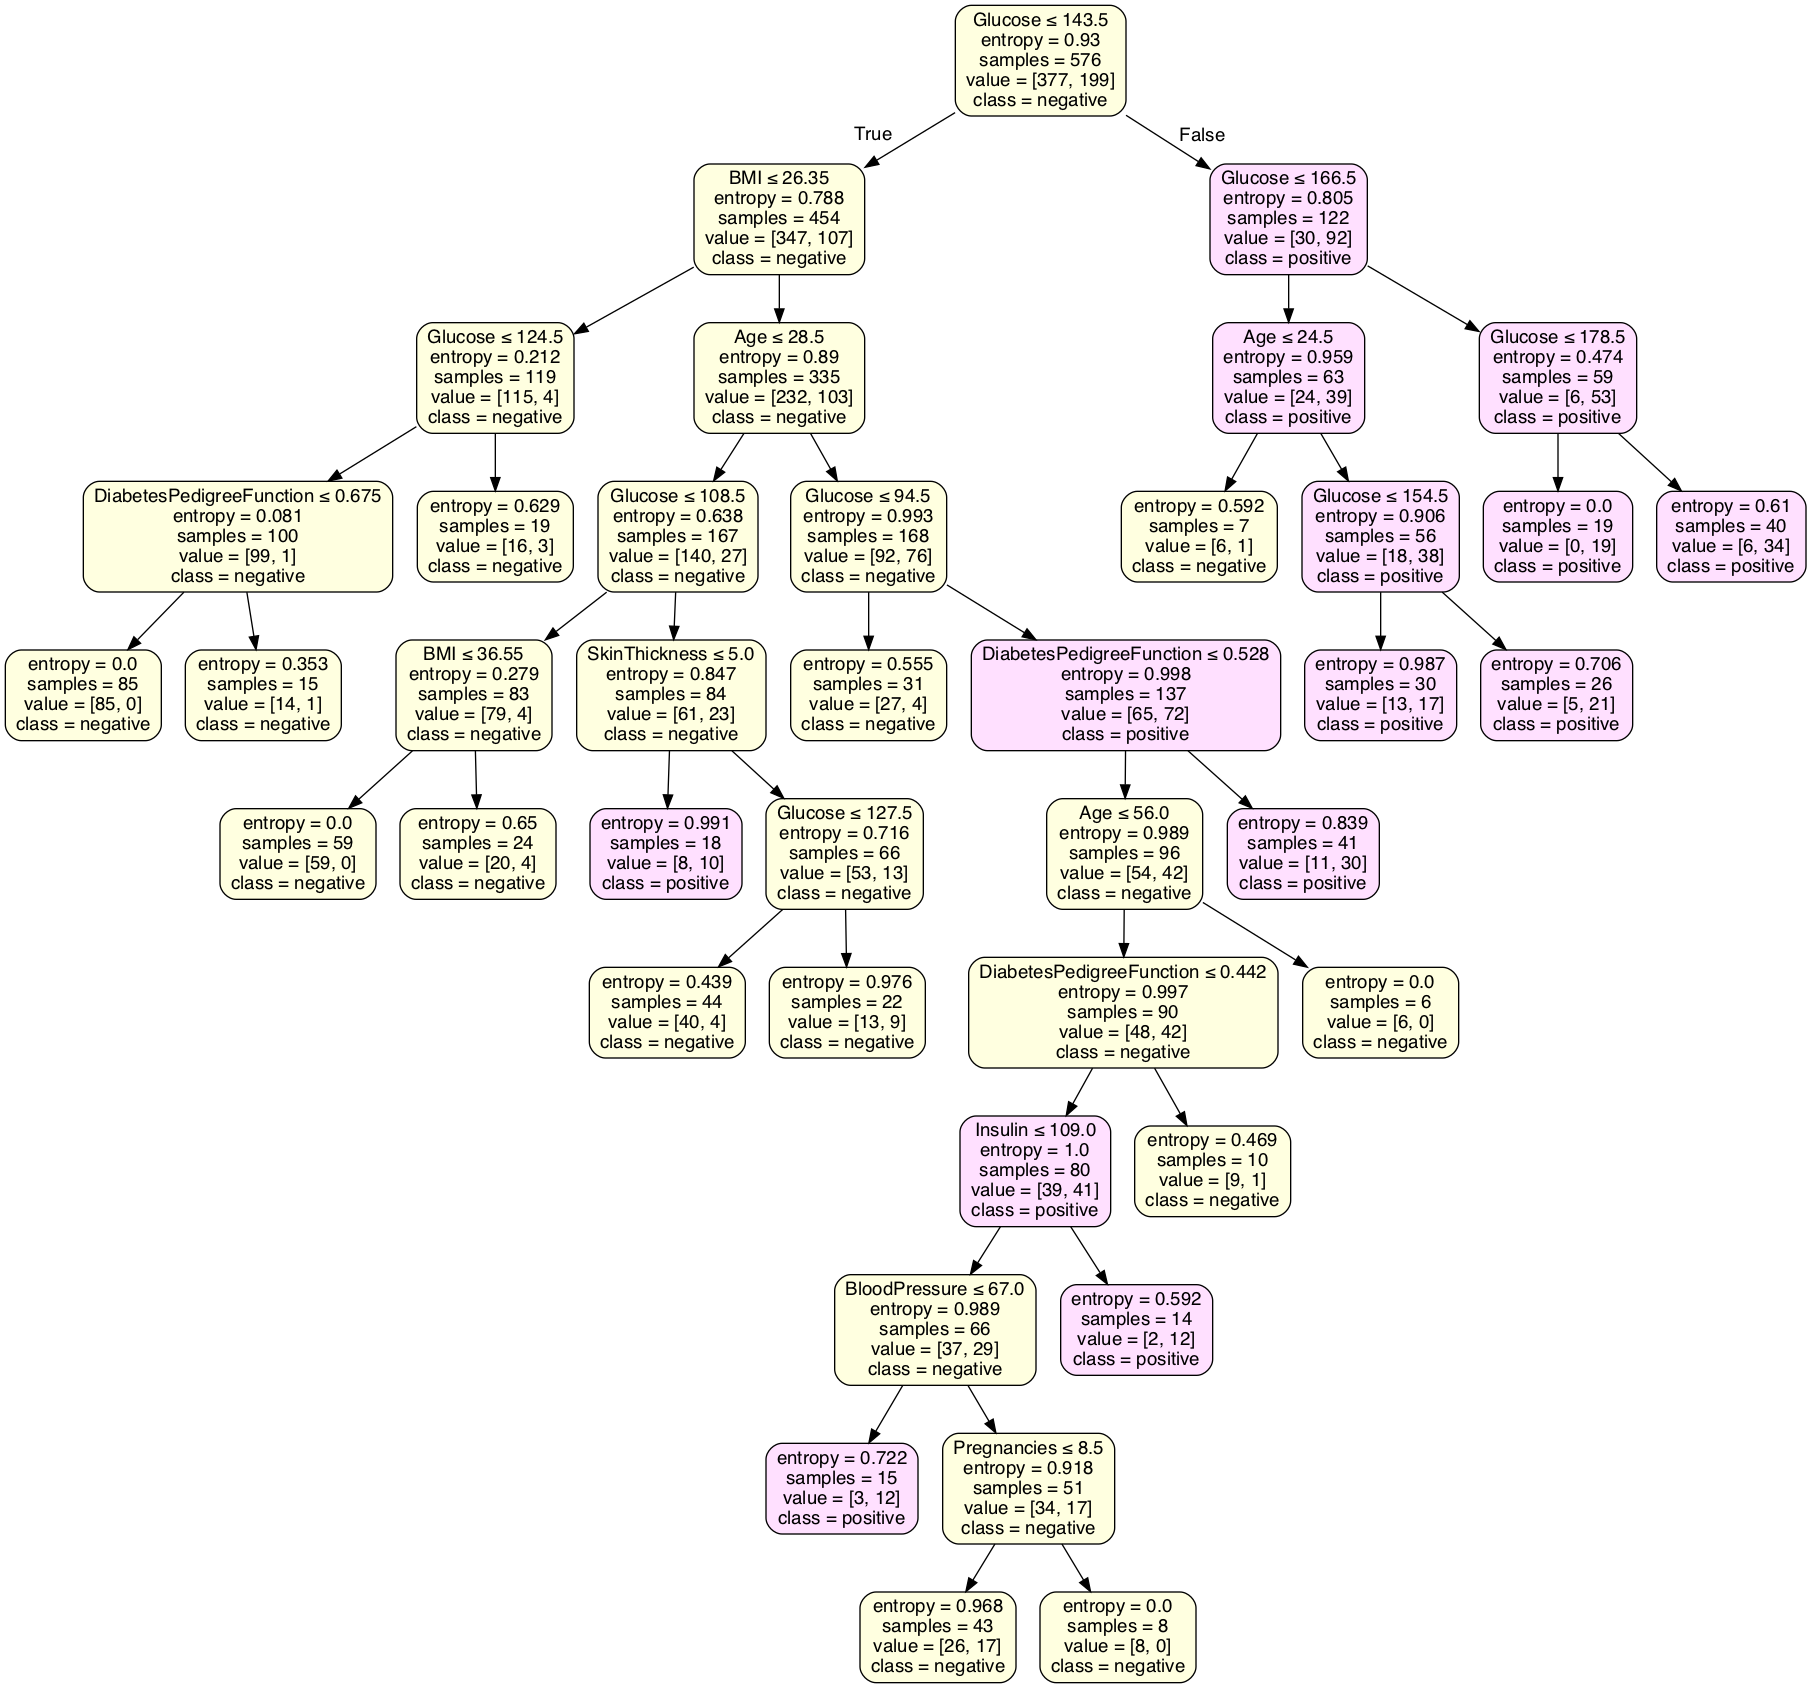

In [45]:
dot_data = export_graphviz(clf, out_file=None,  
                feature_names = feature_names,
                class_names=target_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 

## Color of nodes
nodes = graph.get_node_list()
for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [224,255,255],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )

filename = "diabetes_pruned.png"
graph.write_png(filename)
Image(graph.create_png())

In [46]:
#### use entropy and increase max_depth #### 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.71875


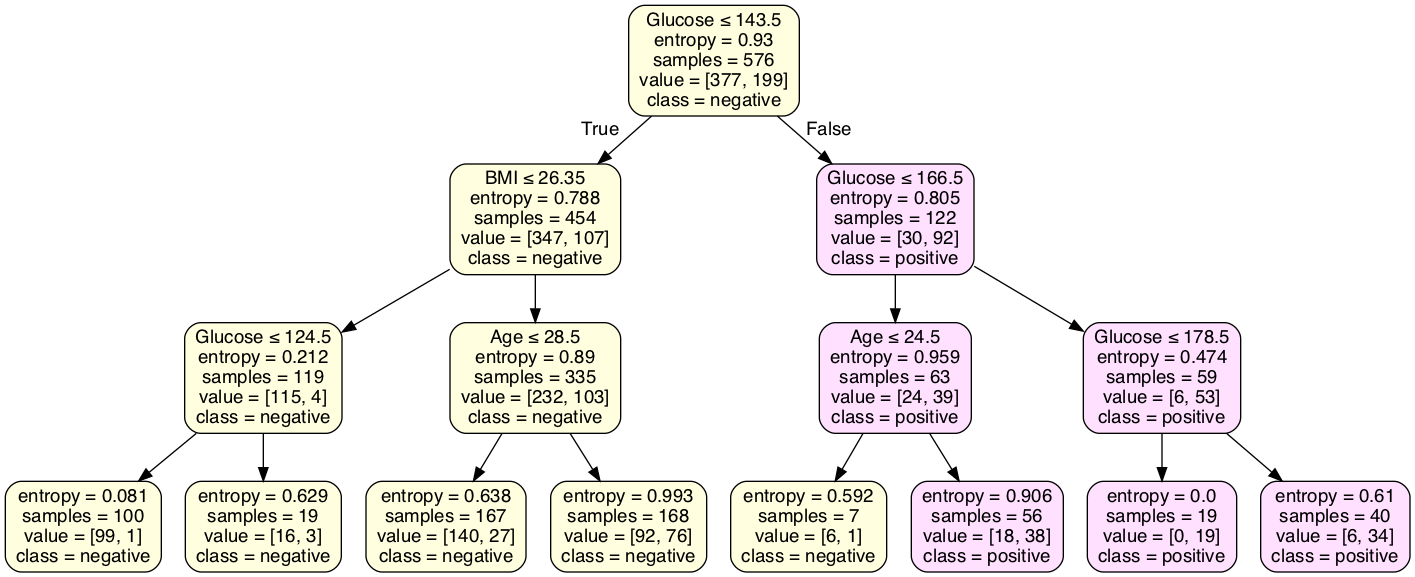

In [47]:
dot_data = export_graphviz(clf, out_file=None,  
                feature_names = feature_names,
                class_names=target_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 

## Color of nodes
nodes = graph.get_node_list()
for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [224,255,255],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )

filename = "diabetes_pruned.png"
graph.write_png(filename)
Image(graph.create_png())